In [164]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
import json
import requests
from bs4 import BeautifulSoup
import json
import requests
from bs4 import BeautifulSoup
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("Dataset") if isfile(join("Dataset", f))]
import re
import operator

from collections import Counter

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
import nltk
from nltk.tokenize import word_tokenize

%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

import pattern
from pattern.en import sentiment
from pattern.en import mood
from textblob import TextBlob

from pattern.en import modality

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
def get_json_from_page(url):
    res = requests.get(url)
    html_page = res.content

    soup = BeautifulSoup(html_page, "lxml")

    dictionary = json.loads(res.content)
    return dictionary

def get_all_tweets_url(dictionary):
    url_tweets = []
    for tweet_data in dictionary['posts']['twitter']:
        url = "https://www.twitter.com/" + tweet_data['author']['tweeter_id'] + "/status/" + tweet_data['tweet_id']
        url_tweets.append(url)
#     print(url_tweets)
    return url_tweets

def get_thread(url):
    headers = {'User-Agent': 'Nokia5310XpressMusic_CMCC/2.0 (10.10) Profile/MIDP-2.1 Configuration/CLDC-1.1 UCWEB/2.0 (Java; U; MIDP-2.0; en-US; Nokia5310XpressMusic) U2/1.0.0 UCBrowser/9.5.0.449 U2/1.0.0 Mobile'}

    res = requests.get(url, headers=headers)
    html_page = res.content
    
    soup = BeautifulSoup(html_page, 'html.parser')

    items = soup.findAll('div', {'class': 'tweet-text'})

    all_text = ""
    for item in items:
        all_text += item.getText() + "\n\n"
    return all_text

def get_json_from_page(url):
    res = requests.get(url)
    html_page = res.content

    soup = BeautifulSoup(html_page, "lxml")

    dictionary = json.loads(res.content)
    return dictionary

def get_all_news(dictionary):
    url_news = []
    for news in dictionary['posts']['news']:
        if news['name'] == 'the_conversation':
            url = news['url']
            print(dictionary['doi'])
            url_news.append(url)
        if news['name'] == 'The Conversation':
            url = news['url']
            url_news.append(url)
    return url_news

def extract_words_from_text(text):
    text = text.replace(".", "")
    text = text.replace("\n", " ")
    text = text.replace("(", " ")
    text = text.replace(")", " ")
    text = text.replace(",", "")
    all_words = text.split(" ")
    all_words = [word.lower() for word in all_words]
    for i in range(len(all_words)):
        if all_words[i] == " " or all_words[i] == "":
            all_words.pop(i)
    print(all_words)
    return all_words

#Given a list of words, this function creates a dictionary using words as keys 
#and their number of appearances as the corresponding values
def create_word_count_dict(word_list):
    word_counter = {"total_number_of_words": 0}
    for word in word_list:
        if word in word_counter:
            word_counter[word] += 1
        elif word not in word_counter:
            word_counter[word] = 1
        word_counter["total_number_of_words"] += 1
    return word_counter

#Creates a word probability dictionary from a word counter dictionary
def create_word_prob_dict(word_count_dict):
    for key in word_count_dict:
        if key is not "total_number_of_words":
            word_count_dict[key] = float(word_count_dict[key] / word_count_dict["total_number_of_words"])
    sorted_x = sorted(word_count_dict.items(), key=operator.itemgetter(1))
    return sorted_x

# Python program to convert a list to string  
def listToString(s):  
    str1 = ""    
    for ele in s:  
        str1 += ele   
    return str1  
          


In [166]:
all_conversation_API = ['https://api.altmetric.com/v1/fetch/doi/10.1002/jmv.25805?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1038/d41586-020-00262-7?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1002/oby.22818?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1002/jmv.25813?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.01.31.929547?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1111/jzo.12769?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1038/s41586-020-2169-0?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.11.20031096?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1002/jmv.25887?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1002/jmv.25887?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.12932/ap-200220-0772?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1038/s41586-020-2279-8?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1038/s41586-020-2279-8?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1038/s41591-020-0819-2?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.12.20062679?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1093/jac/dkaa114?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1038/s41368-020-0074-x?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2009787?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.2139/ssrn.3549276?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.4742?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.14.988345?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1111/jocn.15296?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2001899?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2001899?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2005073?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jpha.2020.03.001?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jpha.2020.03.001?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jpha.2020.03.001?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1002/oby.22838?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1002/oby.22838?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.5582/bst.2020.01047?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmp2003539?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmp2003539?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.3201/eid2602.190697?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jgar.2020.02.021?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.04.20053058?key=bfc9115e2490100d074ded6a3a2cb845', 
'https://api.altmetric.com/v1/fetch/doi/10.1503/cmaj.200476?key=bfc9115e2490100d074ded6a3a2cb845']

In [231]:
#select different API url
API_url = all_conversation_API[5]
print(API_url)

https://api.altmetric.com/v1/fetch/doi/10.1111/jzo.12769?key=bfc9115e2490100d074ded6a3a2cb845


In [232]:
dictionary = get_json_from_page(API_url)
doi = dictionary['citation']['doi']
print(doi)

10.1111/jzo.12769


In [233]:
#get tweets
tweets = []
dictionary = get_json_from_page(API_url)
url_tweets = get_all_tweets_url(dictionary)
for url_tweet in url_tweets:
                    twitter_message = get_thread(url_tweet)
                    tweets.append(twitter_message)

print(tweets)

['', '', '', '', '', '', '\n  Why it’s important to study #coronaviruses in African #bats - a very timely review paper by Wanda Markotter et al. published in @JZoology bit.ly/2SXE1LD and featuring in The Conversation theconversation.com/why-its-import…\n\n\n\n', '\n  Why it’s important to study #coronaviruses in African #bats - a very timely review paper by Wanda Markotter et al. published in @JZoology bit.ly/2SXE1LD and featuring in The Conversation theconversation.com/why-its-import…\n\n\n\n', '\n  Why it’s important to study #coronaviruses in African #bats - a very timely review paper by Wanda Markotter et al. published in @JZoology bit.ly/2SXE1LD and featuring in The Conversation theconversation.com/why-its-import…\n\n\n\n', '\n  This review article is worth your time #Africa, #Tanzania\n…lpublications.onlinelibrary.wiley.com/doi/full/10.11…\n\n\n\n', '\n  This review article is worth your time #Africa, #Tanzania\n…lpublications.onlinelibrary.wiley.com/doi/full/10.11…\n\n\n\n', '\n

In [234]:
tweets = listToString(tweets)

In [235]:
total_number_of_tweets = len(tweets)
countern = 1

from textblob import TextBlob
tb = TextBlob(tweets)
tweets_sentences = tb.sentences

print(tweets_sentences)

[Sentence("
  Why it’s important to study #coronaviruses in African #bats - a very timely review paper by Wanda Markotter et al."), Sentence("published in @JZoology bit.ly/2SXE1LD and featuring in The Conversation theconversation.com/why-its-import…




  Why it’s important to study #coronaviruses in African #bats - a very timely review paper by Wanda Markotter et al."), Sentence("published in @JZoology bit.ly/2SXE1LD and featuring in The Conversation theconversation.com/why-its-import…




  Why it’s important to study #coronaviruses in African #bats - a very timely review paper by Wanda Markotter et al."), Sentence("published in @JZoology bit.ly/2SXE1LD and featuring in The Conversation theconversation.com/why-its-import…




  This review article is worth your time #Africa, #Tanzania
…lpublications.onlinelibrary.wiley.com/doi/full/10.11…




  This review article is worth your time #Africa, #Tanzania
…lpublications.onlinelibrary.wiley.com/doi/full/10.11…




  Why it’s important to 

In [236]:
total_number_of_tweets = len(tweets)
countern = 1
for i in range(1):
    word_list_tweet = re.sub("[^\w]", " ",  tweets).split()
print(word_list_tweet)

['Why', 'it', 's', 'important', 'to', 'study', 'coronaviruses', 'in', 'African', 'bats', 'a', 'very', 'timely', 'review', 'paper', 'by', 'Wanda', 'Markotter', 'et', 'al', 'published', 'in', 'JZoology', 'bit', 'ly', '2SXE1LD', 'and', 'featuring', 'in', 'The', 'Conversation', 'theconversation', 'com', 'why', 'its', 'import', 'Why', 'it', 's', 'important', 'to', 'study', 'coronaviruses', 'in', 'African', 'bats', 'a', 'very', 'timely', 'review', 'paper', 'by', 'Wanda', 'Markotter', 'et', 'al', 'published', 'in', 'JZoology', 'bit', 'ly', '2SXE1LD', 'and', 'featuring', 'in', 'The', 'Conversation', 'theconversation', 'com', 'why', 'its', 'import', 'Why', 'it', 's', 'important', 'to', 'study', 'coronaviruses', 'in', 'African', 'bats', 'a', 'very', 'timely', 'review', 'paper', 'by', 'Wanda', 'Markotter', 'et', 'al', 'published', 'in', 'JZoology', 'bit', 'ly', '2SXE1LD', 'and', 'featuring', 'in', 'The', 'Conversation', 'theconversation', 'com', 'why', 'its', 'import', 'This', 'review', 'article'

In [237]:
dictionary = get_json_from_page(API_url)
doi = dictionary['citation']['doi']
print(doi)

10.1111/jzo.12769


In [238]:
dictionary = get_json_from_page(API_url)
#     print(dictionary)
url_news = []
#     print(dictionary['doi'])
for news in dictionary['posts']['news']:
#         print(news)
    if news['author']['name'] == 'the_conversation!':
        url = news['url']
        print(url)
        url_news.append(url)
    if news['author']['name'] == 'The Conversation':
        url = news['url']
        print(url)
        url_news.append(url)


http://ct.moreover.com/?a=41423346043&p=1pl&v=1&x=lOL3g-NYD_Ayj2lQP5zvDA


In [239]:
print(url)

http://ct.moreover.com/?a=41423346043&p=1pl&v=1&x=lOL3g-NYD_Ayj2lQP5zvDA


In [240]:
# Request
r1 = requests.get(url)
r1.status_code

# We'll save in coverpage the cover page content
coverpage = r1.content

# Soup creation
soup1 = BeautifulSoup(coverpage, 'html.parser')

# News identification
coverpage_news = soup1.find_all('h3', class_='fc-item__title')
len(coverpage_news)

0

In [241]:
print(url)

http://ct.moreover.com/?a=41423346043&p=1pl&v=1&x=lOL3g-NYD_Ayj2lQP5zvDA


In [242]:
# Empty lists for content, links and titles
news_contents = []
list_titles = []

title = requests.get(url)
title_content = title.content
soup_article = BeautifulSoup(title_content, 'html.parser')
body = soup_article.find_all('div', class_='content-header-block')
y = body[0].find_all('h1')

# Unifying the paragraphs
list_paragraphs = []
for p in np.arange(0, len(y)):
    paragraph = y[p].get_text()
    list_paragraphs.append(paragraph)
    final_title = " ".join(list_paragraphs)
    print('TITLE:',final_title)
list_titles.append(final_title)

# Reading the content (it is divided in paragraphs)
article = requests.get(url)
article_content = article.content
soup_article = BeautifulSoup(article_content, 'html.parser')
body = soup_article.find_all('div', class_='grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body')

x = body[0].find_all('p')

# Unifying the paragraphs
list_paragraphs = []
for p in np.arange(0, len(x)):
    paragraph = x[p].get_text()
    list_paragraphs.append(paragraph)
    final_article = " ".join(list_paragraphs)
    print('ARTICLE:', final_article)

news_contents.append(final_article)

TITLE: 

            Why it’s important to study coronaviruses in African bats
          

ARTICLE: The current outbreak of a new coronavirus disease, named COVID-19, raises the question of where diseases like this come from and where the risks lie. By the middle of February almost 2000 people had died in this outbreak, which has also had a global economic impact. 
ARTICLE: The current outbreak of a new coronavirus disease, named COVID-19, raises the question of where diseases like this come from and where the risks lie. By the middle of February almost 2000 people had died in this outbreak, which has also had a global economic impact.  It is clear that the virus may have an animal reservoir. In other words, it may be permanently found in a host species of animal, where it does not normally cause disease. Viruses can spill over from the host to other animals and humans. Evidence points to a possible initial spillover of the virus into humans and other animals in an animal market in Wuh

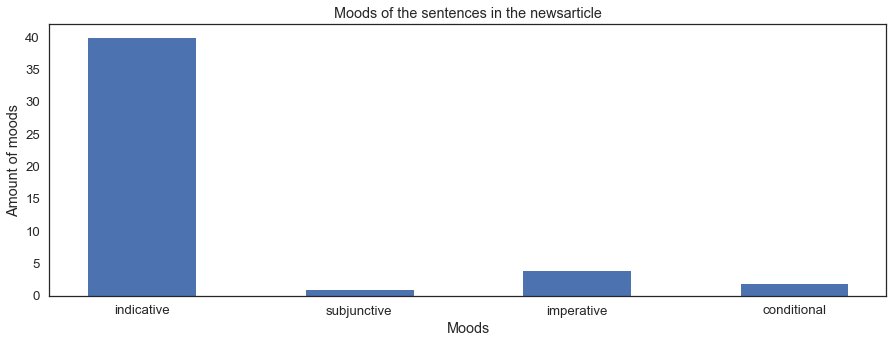

In [243]:
#moods of the sentences in the newsarticle
from textblob import TextBlob
tb = TextBlob(final_article)
sentences = tb.sentences

moods = [mood(str(s)) for s in sentences if len(sentences)>1]

moods = Counter(moods)

plt.figure(figsize=(15,5))
plt.title('Moods of the sentences in the newsarticle')
plt.ylabel('Amount of moods')
plt.xlabel('Moods')
plt.bar(moods.keys(), moods.values(), width=.5, color='b')
plt.savefig("Moods Conversation 25805")

Sentences with negative modality:
-0.041666666666666664 It is clear that the virus may have an animal reservoir.
Sentences with negative modality:
-0.03571428571428571 If it’s closely related, it may be an indication of where the spillover of new viruses came from and whether it poses a risk of a disease outbreak.


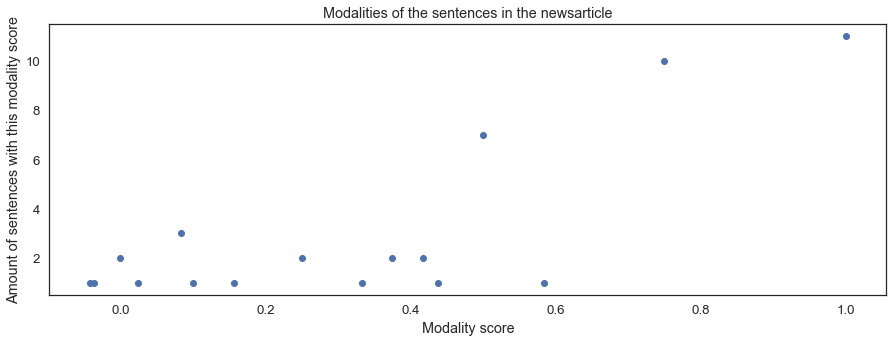

In [244]:
#MODALITY of the sentences in the newsarticle
from pattern.en import modality
modalities = [modality(str(s)) for s in sentences if len(s.words)>1]

modalities = Counter(modalities)

plt.figure(figsize=(15,5))
plt.title('Modalities of the sentences in the newsarticle')
plt.xlabel('Modality score')
plt.ylabel('Amount of sentences with this modality score')
# plt.bar(modalities.keys(), modalities.values(), width=.5, color='g')
plt.scatter(modalities.keys(), modalities.values())
plt.savefig("Modalities news Conv")
plt.show

#print negative so possibole not true:
for s in sentences:
    if len(s.words)>1:
        if modality(str(s)) < 0.0:
            print('Sentences with negative modality:')
            print(modality(str(s)), s)

[(0.06818181818181818, 0.42727272727272725), (0.06666666666666667, 0.06666666666666667), (0.10000000000000002, 0.3833333333333333), (-0.1, 0.5125), (-0.125, 0.375), (-0.041666666666666664, 0.4583333333333333), (0.5, 0.5), (0.04545454545454545, 0.28484848484848485), (0.13333333333333333, 0.4666666666666666), (0.0, 0.0), (-0.041666666666666664, 0.2916666666666667), (0.06818181818181818, 0.42727272727272725), (0.0, 0.0), (0.03333333333333333, 0.4666666666666666), (0.04583333333333334, 0.32916666666666666), (0.1875, 0.4875), (-0.125, 0.375), (0.25, 0.3333333333333333), (0.25, 0.3333333333333333), (0.0, 0.0), (0.03333333333333333, 0.4666666666666666), (0.0, 0.0), (0.05, 0.25), (0.06666666666666667, 0.20833333333333334), (0.19999999999999998, 0.6333333333333333), (0.05, 0.25), (0.0, 1.0), (-0.022727272727272724, 0.6515151515151515), (0.175, 0.425), (0.0, 0.2), (0.125, 0.2916666666666667), (0.16, 0.5399999999999999), (0.375, 0.75), (0.0, 0.4), (0.41666666666666663, 0.8666666666666667), (0.0, 

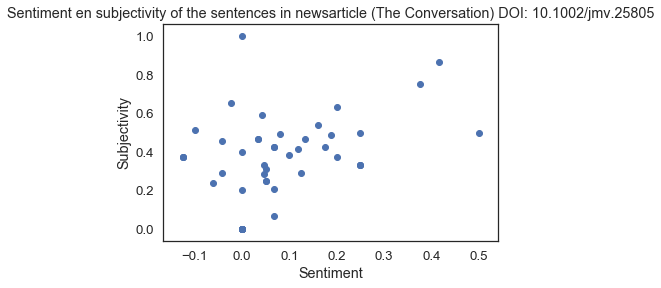

In [245]:
#get Sentiment en subjectivity scores of the sentences in the newsarticle

from pattern.en import sentiment
    
sentiment = [sentiment(str(s)) for s in sentences if len(s.words)>1]
print(sentiment)

x, y = zip(*sentiment)
plt.scatter(x, y)
plt.title('Sentiment en subjectivity of the sentences in newsarticle (The Conversation) DOI: 10.1002/jmv.25805')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')
plt.show()


# sentiment = Counter(sentiment)

# plt.figure(figsize=(15,5))
# plt.title('concepts appearance tweets')
# plt.bar(sentiment.keys(|), sentiment.values(), width=.5, color='g')

[[0.16863005 0.74898359]
 [0.00833333 0.00833333]
 [0.00550325 0.34868146]
 [0.21278935 0.43315972]]
[2 1 2 2 2 2 3 2 3 1 2 2 1 2 2 3 2 3 3 1 2 1 2 2 0 2 0 0 3 2 2 3 0 2 0 1 3
 2 3 2 1 1 0 3 3 3 2]


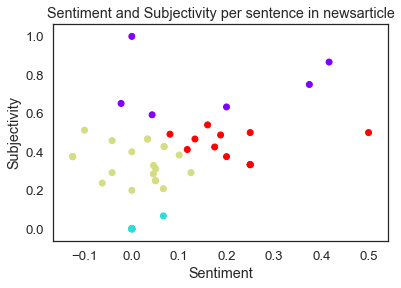

In [246]:
#K-MEANS over the senitment/subjectivity of the sentences in the newsarticle

x, y = zip(*sentiment)
# plt.scatter(x, y)
# plt.show()

X = np.array(sentiment)

# plt.scatter(X[:,0],X[:,1], label='True Position')

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.title('Sentiment and Subjectivity per sentence in newsarticle')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')


plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.savefig('Sentiment news conv')

In [247]:
len(sentiment)

47

TWEETS with negative modality:
-0.17307692307692307 published in @JZoology bit.ly/2SXE1LD and featuring in The Conversation theconversation.com/why-its-import…




  How African bats could be crucial to understanding Coronavirus @YahooNews coverage ow.ly/hFQB30qkbKo Read the full @JZoology article ow.ly/seYd30qkbKp




  How African bats could be crucial to understanding Coronavirus @YahooNews coverage ow.ly/hFQB30qkbKo Read the full @JZoology article ow.ly/seYd30qkbKp




  How African bats could be crucial to understanding Coronavirus @YahooNews coverage ow.ly/hFQB30qkbKo Read the full @JZoology article ow.ly/seYd30qkbKp




  Bat‐borne viruses in Africa: a critical review …lpublications.onlinelibrary.wiley.com/doi/full/10.11…




  This is a timely review of bat-borne viruses, including coronaviruses.


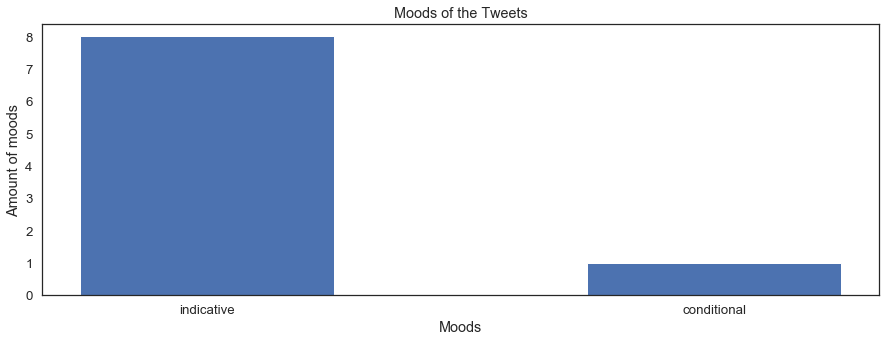

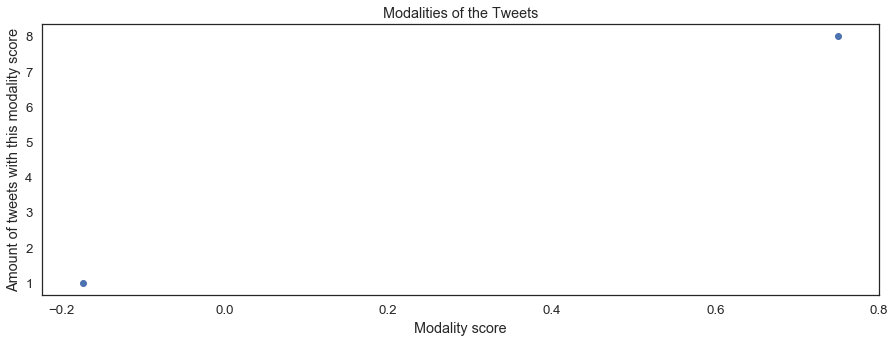

In [248]:
#mood FOR TWEETS
from pattern.en import sentiment

moods_T = [mood(str(s)) for s in tweets_sentences if len(tweets_sentences)>1]
moods_T = Counter(moods_T)

plt.figure(figsize=(15,5))
plt.title('Moods of the Tweets')
plt.ylabel('Amount of moods')
plt.xlabel('Moods')
plt.bar(moods_T.keys(), moods_T.values(), width=.5, color='b')
plt.savefig('moods of tweets')



#MODALITY of the sentences in the newsarticle
from pattern.en import modality
modalities_T = [modality(str(s)) for s in tweets_sentences if len(s.words)>1]

modalities_T = Counter(modalities_T)

plt.figure(figsize=(15,5))
plt.title('Modalities of the Tweets')
plt.xlabel('Modality score')
plt.ylabel('Amount of tweets with this modality score')
# plt.bar(modalities.keys(), modalities.values(), width=.5, color='g')
plt.scatter(modalities_T.keys(), modalities_T.values())
plt.savefig("modality of tweets")
plt.show

#print negative so possibole not true:
print('TWEETS with negative modality:')
for s in tweets_sentences:
    if len(s.words)>1:
        if modality(str(s)) < 0.0:
            print(modality(str(s)), s)


[[0.208      0.40666667]
 [0.         0.8       ]
 [0.         0.        ]
 [0.105      0.545     ]]
[0 0 0 0 3 0 1 2 2]


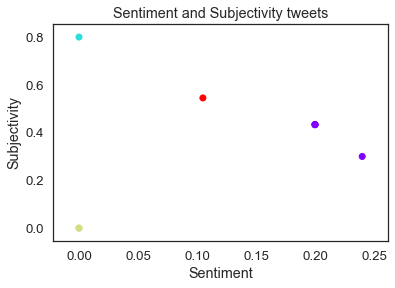

In [249]:
#Sentiment / subjectivity for TWEETS

sentiment_T = [sentiment(str(s)) for s in tweets_sentences if len(s.words)>1]
# print(sentiment_T)
x_T, y_T = zip(*sentiment_T)
# plt.scatter(x_T, y_T)
# plt.show()

X_T = np.array(sentiment_T)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_T)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.title('Sentiment and Subjectivity tweets')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')

plt.scatter(X_T[:,0],X_T[:,1], c=kmeans.labels_, cmap='rainbow')
plt.savefig('Sentiment of tweets')
plt.show()


In [250]:
print(len(tweets_sentences))

9


In [251]:
# load Dimensions data

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = []
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [252]:
df_article = pd.DataFrame.from_dict({
    "doi":[r["doi"] for r in all_dimensions],
    "concepts":[r["concepts"] for r in all_dimensions],
    "year":[r["year"] for r in all_dimensions],
})


df_article = df_article[df_article.year >= 2020.0]

df_article.dropna()

,doi,concepts,year
886,10.1016/b978-0-08-102295-5.10439-1,"{'infectious diseases': 1.0, 'disease': 1.0, '...",2020
887,10.1016/b978-0-08-102659-5.00005-7,"{'leaves': 1.0, 'perennial shrub': 1.0, 'shrub...",2020
888,10.1016/b978-0-08-102295-5.10438-x,"{'communicable diseases': 1.0, 'serious threat...",2020
889,10.1016/b978-0-08-102295-5.10406-8,"{'basic cause': 1.0, 'data': 1.0, 'effect': 1....",2020
890,10.1016/b978-0-08-102565-9.00015-7,"{'conventional disinfection methods': 1.0, 'di...",2020
...,...,...,...
130143,10.3290/j.qi.a44392,"{'urgent need': 1.0, 'need': 1.0, 'protocol': ...",2020
130144,10.3290/j.cjdr.a44339,"{'disease': 1.0, 'respiratory disease': 1.0, '...",2020
130145,10.32858/temblor.078,{'pandemic': 1.0},2020
130146,10.33196/ziir202002014901,{},2020


In [253]:
#DOI pakken

concepts = []
length = df_article.shape[0]

for i in range(48885):
    for element in df_article.doi[i-1:i]:
        if doi in str(element):
            for entry in df_article.concepts[i-1:i]:
                #print(df_article.concepts[i-1:i])
                concepts.append(entry)
                    
print(len(concepts))
print(concepts)

pd.DataFrame.from_dict(concepts)

2
[{'Africa': 1.0, 'bat-borne zoonoses': 1.0, 'zoonosis': 1.0, 'decades': 1.0, 'large outbreak': 1.0, 'outbreak': 1.0, 'addition': 1.0, 'hundreds': 1.0, 'more viruses': 1.0, 'virus': 1.0, 'zoonotic potential': 1.0, 'potential': 1.0, 'bats': 1.0, 'bat biology': 1.0, 'biology': 1.0, 'evolution': 1.0, 'ecology': 1.0, 'most mammals': 1.0, 'mammals': 1.0, 'viral reservoir': 1.0, 'reservoir': 1.0, 'anthropogenic factors': 1.0, 'factors': 1.0, 'role': 1.0, 'events': 1.0, 'current knowledge': 1.0, 'knowledge': 1.0, 'African bats': 1.0, 'Filo': 1.0, 'paramyxo': 1.0, 'lyssaviruses': 1.0, 'important information': 1.0, 'epidemiology': 1.0, 'zoonotic spillover': 1.0, 'knowledge gaps': 1.0, 'role of bats': 1.0, 'zoonotic disease outbreaks': 1.0, 'disease outbreaks': 1.0, 'strategies': 1.0, 'exposure': 1.0, 'infectious agents': 1.0, 'agents': 1.0, 'crucial role': 1.0, 'ecosystem services': 1.0, 'development': 1.0, 'infection': 1.0, 'conservation': 1.0, 'species': 1.0, 'hundreds of viruses': 1.0, 'hum

,Africa,bat-borne zoonoses,zoonosis,decades,large outbreak,outbreak,addition,hundreds,more viruses,virus,...,development,infection,conservation,species,hundreds of viruses,human deaths,death,majority,Bat-borne viruses,review
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [254]:
total_number_of_files = len(final_article)
counter = 1
for i in range(1):
    word_list= re.sub("[^\w]", " ",  final_article).split()
    word_count_dict = create_word_count_dict(word_list)
    word_probability_dict = create_word_prob_dict(word_count_dict)
#     print("Word probability dict created for text #" + str(counter))
#     print(word_probability_dict)
    counter += 1

In [255]:
ten_percent = len(word_probability_dict)/10
ten_percent = round(ten_percent)
print(ten_percent)

print(word_probability_dict[ten_percent:])

36
[('clue', 0.0010649627263045794), ('stopping', 0.0010649627263045794), ('Knowing', 0.0010649627263045794), ('adapt', 0.0010649627263045794), ('Bats', 0.0010649627263045794), ('prone', 0.0010649627263045794), ('act', 0.0010649627263045794), ('Rhinolophus', 0.0010649627263045794), ('already', 0.0010649627263045794), ('suggests', 0.0010649627263045794), ('elsewhere', 0.0010649627263045794), ('including', 0.0010649627263045794), ('Scientists', 0.0010649627263045794), ('keep', 0.0010649627263045794), ('doing', 0.0010649627263045794), ('bio', 0.0010649627263045794), ('specifically', 0.0010649627263045794), ('looking', 0.0010649627263045794), ('pieces', 0.0010649627263045794), ('genomes', 0.0010649627263045794), ('researchers', 0.0010649627263045794), ('determine', 0.0010649627263045794), ('genome', 0.0010649627263045794), ('sequence', 0.0010649627263045794), ('analyse', 0.0010649627263045794), ('closely', 0.0010649627263045794), ('indication', 0.0010649627263045794), ('came', 0.0010649627

12.09 % of the most frequent words = concepts


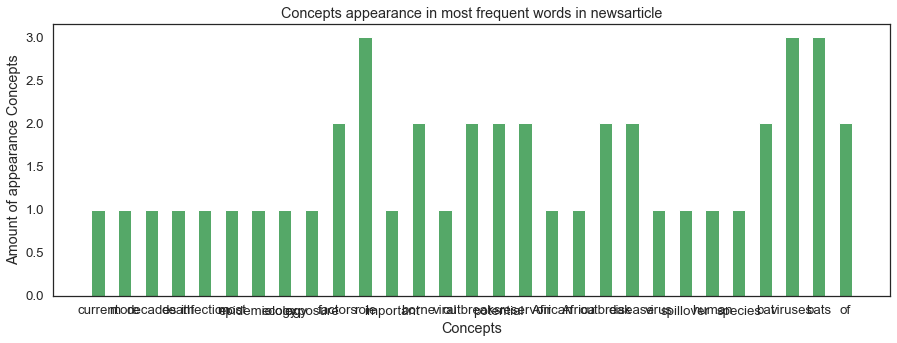

In [256]:
#comparing word prob. news article with concepts
doubles_freq = []

x = word_probability_dict
y = concepts[0]

concepts_y = []
for m in y:
    m_list = re.sub("[^\w]", " ",  m).split()
    concepts_y.extend(m_list)

counter = 0
for k in x:
    for m in concepts_y:
        if k[0] == m:
            counter += 1
            doubles_freq.append(m)
#             print(m)

length = len(concepts)
percentage = length/counter
# print(percentage)


counted = Counter(doubles_freq)
# print(y)
# print(counted)


plt.figure(figsize=(15,5))
plt.title('Concepts appearance in most frequent words in newsarticle')
plt.xlabel('Concepts')
plt.ylabel('Amount of appearance Concepts')
plt.bar(counted.keys(), counted.values(), width=.5, color='g')
plt.savefig('Concepts most freq conv one')

percentage_concepts_freq = 100 * (float(counter) / float(len(x)))
percent = round(percentage_concepts_freq, 2)
print(percent, "% of the most frequent words = concepts")

In [257]:
#POS-tagging

text = word_tokenize(final_article)
tagged = nltk.pos_tag(text)
nouns = []
for item in tagged:
    if item[1][0] == 'N':
      nouns.append(item[0])
    
print(nouns)

['outbreak', 'coronavirus', 'disease', 'COVID-19', 'question', 'diseases', 'come', 'risks', 'lie', 'middle', 'February', 'people', 'outbreak', 'impact', 'virus', 'reservoir', 'words', 'host', 'species', 'animal', 'disease', 'Viruses', 'host', 'animals', 'humans', 'Evidence', 'points', 'spillover', 'virus', 'humans', 'animals', 'market', 'Wuhan', 'China', 'clue', 'coronavirus', 'Knowing', 'viruses', 'animals', 'humans', 'Bats', 'reservoir', 'viruses', 'populations', 'horseshoe', 'bat', 'genus', 'Rhinolophus', 'viruses', 'coronavirus', 'viruses', 'genus', 'bats', 'countries', 'Scientists', 'continent', 'watch', 'bio-surveillance', 'pieces', 'coronavirus', 'genomes', 'bat', 'species', 'researchers', 'sequence', 'coronaviruses', 'indication', 'spillover', 'viruses', 'risk', 'disease', 'outbreak', 'horseshoe', 'bat', 'genus', 'world', 'species', 'Africa', 'viruses', 'cause', 'COVID-19', 'disease', 'bat', 'species', 'surveillance', 'coronavirus', 'diversity', 'bats', 'decades', 'novel', 'cor

81
Counter({'viruses': 48, 'bats': 48, 'bat': 26, 'disease': 12, 'outbreak': 10, 'reservoir': 8, 'species': 8, 'spillover': 7, 'virus': 6, 'Africa': 4, 'outbreaks': 4, 'role': 3, 'potential': 2, 'factors': 2, 'decades': 1, 'death': 1, 'infection': 1, 'epidemiology': 1, 'ecology': 1, 'exposure': 1})
68.07 % of the POS nouns = concepts


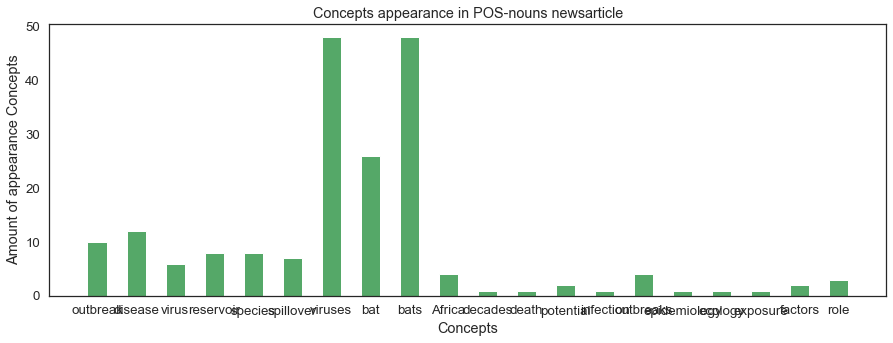

In [258]:
print(len(concepts_y))
doubles_POS = []
counts = 0
for k in nouns:
    for m in concepts_y:
        if k == m:
            counts += 1
            doubles_POS.append(m)
#             print(m)
            
            
length = len(concepts)
percentage = length/counts
# print(percentage)


counteren = Counter(doubles_POS)
print(counteren)

plt.figure(figsize=(15,5))
plt.title('Concepts appearance in POS-nouns newsarticle')
plt.xlabel('Concepts')
plt.ylabel('Amount of appearance Concepts')
plt.bar(counteren.keys(), counteren.values(), width=.5, color='g')

percentage_concepts_pos = 100 * (float(counts) / float(len(nouns)))
percent_pos = round(percentage_concepts_pos, 2)
print(percent_pos, "% of the POS nouns = concepts")

plt.savefig('Concepts POS conv one')

In [259]:
doubles_tweets = []
counts = 0
for k in word_list_tweet:
    for m in concepts_y:
        if k == m:
            counts += 1
            print(m)
            doubles_tweets.append(m)

important
African
bats
bats
bats
review
important
African
bats
bats
bats
review
important
African
bats
bats
bats
review
review
Africa
review
Africa
important
African
bats
bats
bats
review
African
bats
bats
bats
crucial
African
bats
bats
bats
crucial
African
bats
bats
bats
crucial
Bat
borne
borne
viruses
viruses
viruses
Africa
review
review
of
of
bat
bat
borne
borne
viruses
viruses
viruses
bats
bats
bats
viruses
viruses
viruses
important
African
bats
bats
bats
review
Bat
borne
borne
viruses
viruses
viruses
Bat
borne
borne
viruses
viruses
viruses
Bat
borne
borne
viruses
viruses
viruses
Africa
review
Bat
borne
borne
viruses
viruses
viruses
Africa
review
Bat
borne
borne
viruses
viruses
viruses
Africa
review
Bat
borne
borne
viruses
viruses
viruses
Africa
review
Bat
borne
borne
Africa


In [260]:
recounted = Counter(doubles_tweets)
recounted

Counter({'important': 5,
         'African': 8,
         'bats': 27,
         'review': 13,
         'Africa': 8,
         'crucial': 3,
         'Bat': 8,
         'borne': 18,
         'viruses': 27,
         'of': 2,
         'bat': 2})

27.88 % of the words in the tweets = concepts


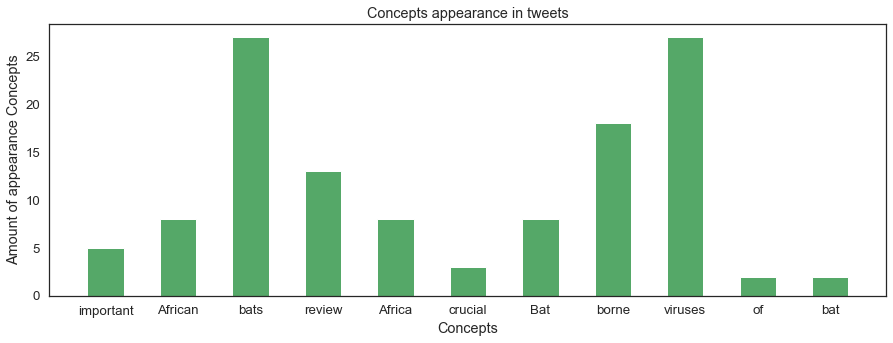

In [261]:
percentage_concepts_t = 100 * (float(counts) / float(len(word_list_tweet)))
percent_t = round(percentage_concepts_t, 2)

plt.figure(figsize=(15,5))
plt.title('Concepts appearance in tweets')
plt.xlabel('Concepts')
plt.ylabel('Amount of appearance Concepts')
plt.bar(recounted.keys(), recounted.values(), width=.5, color='g')
print(percent_t, "% of the words in the tweets = concepts")
plt.savefig('Conepts tweets Conv')